### First, let's load the dataset and check for any missing values

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('housing.csv')
df.head()
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### Since the percentage of null values within the dataset is ~1%, we've gone ahead and deleted all those missing rows

In [9]:
df = df.dropna(axis=0)
df.isnull().sum()
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Now, let's check for any duplicates that might be present within the dataset

In [10]:
df.duplicated().sum()

np.int64(0)

### Let's plot a Correlation Matrix to check the relations between the various numerical columns present within the dataset


Correlation Matrix:
                     longitude  latitude  ...  median_income  median_house_value
longitude            1.000000 -0.924616  ...      -0.015550           -0.045398
latitude            -0.924616  1.000000  ...      -0.079626           -0.144638
housing_median_age  -0.109357  0.011899  ...      -0.118278            0.106432
total_rooms          0.045480 -0.036667  ...       0.197882            0.133294
total_bedrooms       0.069608 -0.066983  ...      -0.007723            0.049686
population           0.100270 -0.108997  ...       0.005087           -0.025300
households           0.056513 -0.071774  ...       0.013434            0.064894
median_income       -0.015550 -0.079626  ...       1.000000            0.688355
median_house_value  -0.045398 -0.144638  ...       0.688355            1.000000

[9 rows x 9 columns]


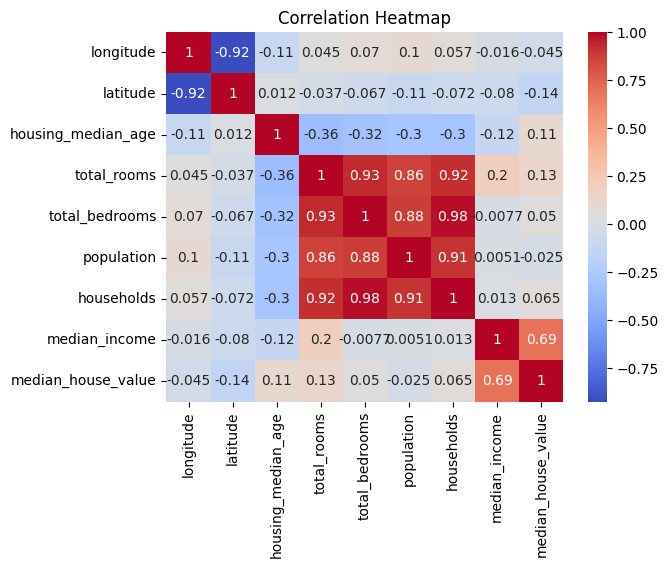

In [11]:
print("\nCorrelation Matrix:\n", df.corr(numeric_only=True))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### Out of all the numerical columns, 'median_income' is the only columns with a correlation value of > 0.50 (0.69) indicating that it's the only paramter that's impacting 'median_house_value' in a significant way

In [12]:
# One-hot encoding for 'ocean_proximity'
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=False)

### One hot encoding is used to make derived columns using the 'ocean_proximity' column

In [13]:
y = df['median_house_value']
X = df.drop(columns=['median_house_value'])

### Here, we've split the dataset in a 70:30 ratio of training and testing data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nTraining size:", X_train.shape)
print("Test size:", X_test.shape)


Training size: (14303, 13)
Test size: (6130, 13)


In [15]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


### Then, we have to standardize the data into arrays before proceeding with the classification

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled
X_test_scaled

array([[ 1.17043166, -1.33610015, -0.68343356, ..., -0.01182583,
        -0.35702009,  2.60745095],
       [-0.85160414,  1.10809273, -2.1128161 , ..., -0.01182583,
        -0.35702009, -0.38351632],
       [ 0.72109037, -0.80699326,  0.190078  , ..., -0.01182583,
        -0.35702009, -0.38351632],
       ...,
       [-0.90153095,  1.42649334,  0.11066786, ..., -0.01182583,
        -0.35702009, -0.38351632],
       [-0.93148703,  2.52684837,  0.34889828, ..., -0.01182583,
        -0.35702009, -0.38351632],
       [-0.89154559,  1.42181098,  0.50771856, ..., -0.01182583,
        -0.35702009, -0.38351632]], shape=(6130, 13))

### First, we've used the Linear Regression Model on the testing data

In [17]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

### Let's look at some of the Actual V/S Predicted House Values 

In [18]:
y_pred = model.predict(X_test_scaled)
predictions_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print("\nActual vs. Predicted House Values:")
print(predictions_df.head(10))


Actual vs. Predicted House Values:
         Actual      Predicted
14416  245800.0  202109.370523
16383  137900.0  147479.936702
7731   218200.0  208721.374598
1410   220800.0  181135.612522
1335   170500.0  188996.764622
16260   75000.0   95423.430209
18011  269400.0  286723.975361
10086  228900.0  258384.664157
18294  500001.0  385471.627470
18733   80800.0   62631.430085


### Calculating Critical measurable error indicating parameters like MAE, MSE, RMSE and R^2 Score

In [19]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("\nModel Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Model Performance Metrics:
Mean Absolute Error (MAE): 49643.00
Mean Squared Error (MSE): 4614164009.96
Root Mean Squared Error (RMSE): 67927.64
R² Score: 0.65


### Plot for Linear Regression Model

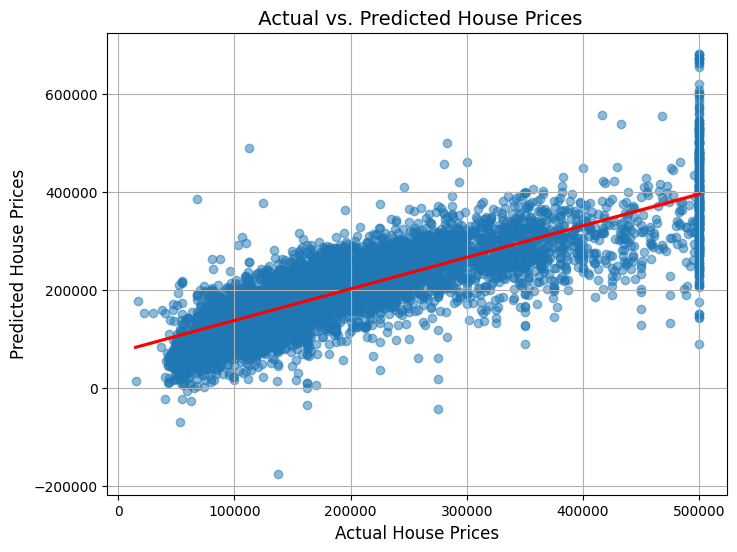

In [20]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Actual House Prices", fontsize=12)
plt.ylabel("Predicted House Prices", fontsize=12)
plt.title(" Actual vs. Predicted House Prices", fontsize=14)
plt.grid(True)
plt.show()

In [21]:
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")

Random Forest Model Performance:
Mean Absolute Error (MAE): 31407.54
Mean Squared Error (MSE): 2355484786.26
Root Mean Squared Error (RMSE): 48533.34
R² Score: 0.82


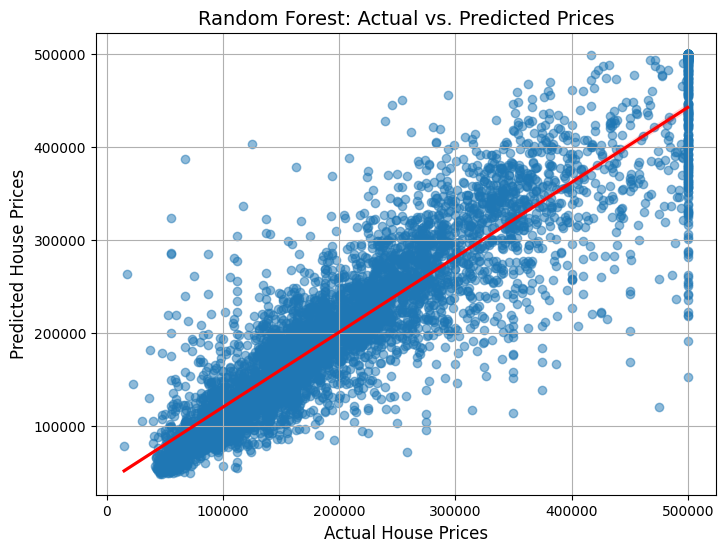

In [22]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_rf, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

plt.xlabel("Actual House Prices", fontsize=12)
plt.ylabel("Predicted House Prices", fontsize=12)
plt.title("Random Forest: Actual vs. Predicted Prices", fontsize=14)
plt.grid(True)
plt.show()

In [23]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)

xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"R² Score: {r2_xgb:.2f}")


XGBoost Model Performance:
Mean Absolute Error (MAE): 31017.71
Mean Squared Error (MSE): 2197304126.86
Root Mean Squared Error (RMSE): 46875.41
R² Score: 0.84


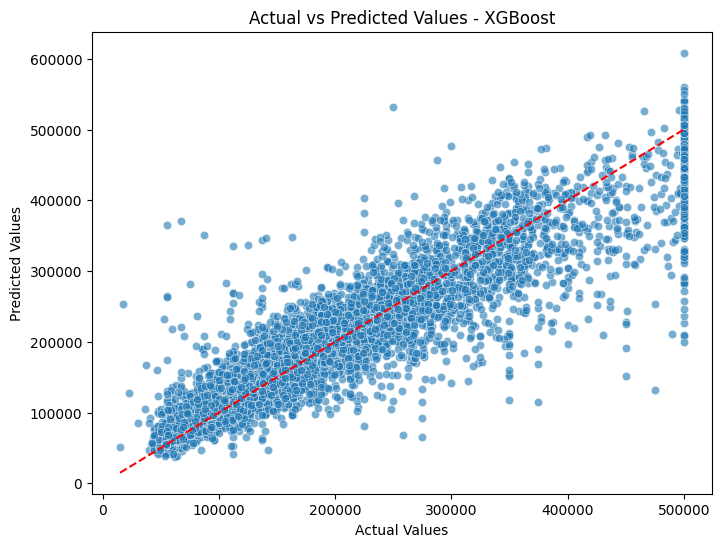

In [24]:
y_pred_xgb = xgb_model.predict(X_test_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values - XGBoost")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')  # Perfect prediction line
plt.show()

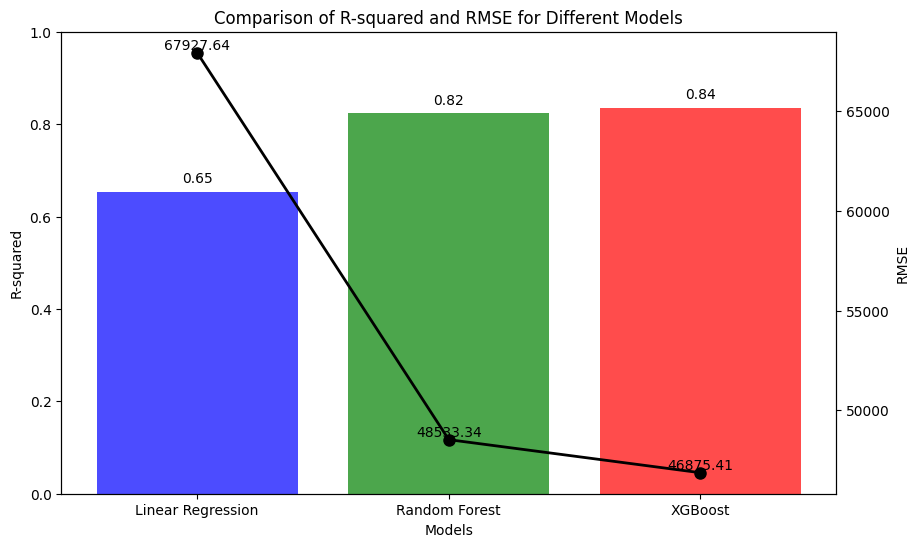

In [25]:
import numpy as np
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Random Forest', 'XGBoost']

r2_scores = [r2, r2_rf, r2_xgb]
rmse_scores = [rmse, rmse_rf, rmse_xgb]

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(models, r2_scores, color=['blue', 'green', 'red'], alpha=0.7, label='R² Scores')
ax1.set_xlabel('Models')
ax1.set_ylabel('R-squared', color='black')
ax1.set_ylim(0, 1)
ax1.set_title('Comparison of R-squared and RMSE for Different Models')

for i, v in enumerate(r2_scores):
    ax1.text(i, v + 0.02, str(round(v, 2)), ha='center', fontsize=10, color='black')

ax2 = ax1.twinx()
ax2.plot(models, rmse_scores, marker='o', linestyle='-', color='black', label='RMSE', linewidth=2, markersize=8)
ax2.set_ylabel('RMSE', color='black')

for i, v in enumerate(rmse_scores):
    ax2.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontsize=10, color='black')
plt.show()


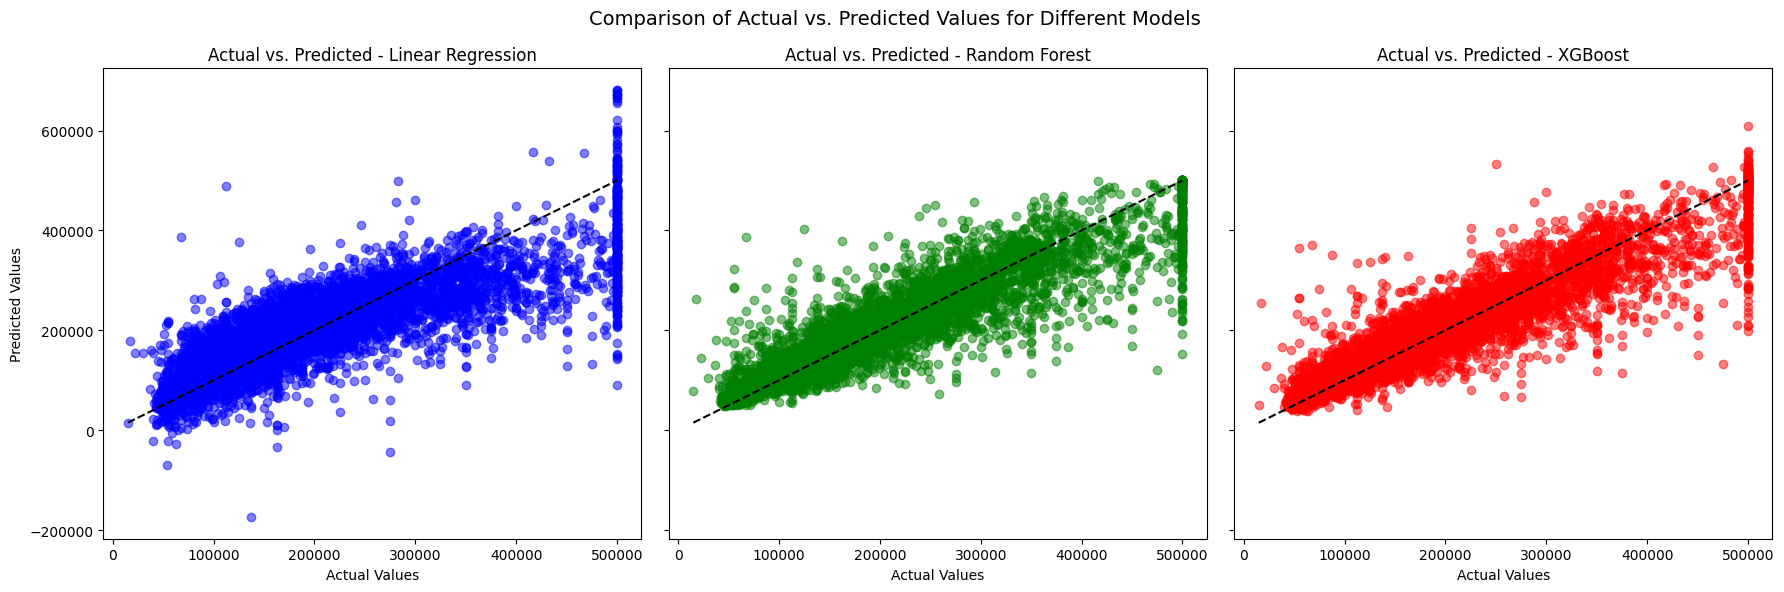

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

models = ['Linear Regression', 'Random Forest', 'XGBoost']
predictions = [y_pred, y_pred_rf, y_pred_xgb]
colors = ['blue', 'green', 'red']

for i, ax in enumerate(axes):
    ax.scatter(y_test, predictions[i], alpha=0.5, color=colors[i])
    
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black')

    ax.set_title(f'Actual vs. Predicted - {models[i]}')
    ax.set_xlabel('Actual Values')
    
    if i == 0: 
        ax.set_ylabel('Predicted Values')

plt.suptitle('Comparison of Actual vs. Predicted Values for Different Models', fontsize=14)
plt.tight_layout()
plt.show()
